# Cifar10 Dataset

In [45]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
path_data = './'

In [46]:
train = torchvision.datasets.CIFAR10(root=path_data, train=True, download=True) 
test = torchvision.datasets.CIFAR10(root=path_data, train=False, download=True) 

Files already downloaded and verified
Files already downloaded and verified


In [47]:
cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

In [48]:
train.transform = cifar_transform
test.transform = cifar_transform
train.transforms = torchvision.datasets.vision.StandardTransform(cifar_transform)
test.transforms = torchvision.datasets.vision.StandardTransform(cifar_transform)

In [49]:
trainloader = torch.utils.data.DataLoader(train, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(train, batch_size=4,
                                          shuffle=False, num_workers=2)

In [50]:
train_iter = iter(trainloader)
images, labels = train_iter.next()
print(images[0])

tensor([[[-0.1922,  0.0431,  0.1843,  ...,  0.0745,  0.0745,  0.0431],
         [-0.0196,  0.0118,  0.1686,  ...,  0.0667,  0.0824,  0.0667],
         [ 0.0196, -0.0588, -0.2078,  ...,  0.0745,  0.1059,  0.0980],
         ...,
         [-0.1059, -0.0980, -0.0431,  ..., -0.1216, -0.1529, -0.1843],
         [-0.0902, -0.0902, -0.0902,  ..., -0.1294, -0.1608, -0.2078],
         [-0.0902, -0.0902, -0.1059,  ..., -0.0745, -0.1216, -0.1373]],

        [[-0.1843, -0.0196,  0.0510,  ...,  0.1059,  0.1137,  0.0824],
         [-0.0353, -0.0118,  0.1137,  ...,  0.1137,  0.1216,  0.0902],
         [ 0.0039, -0.0275, -0.1686,  ...,  0.1451,  0.1451,  0.1216],
         ...,
         [ 0.0353,  0.0510,  0.0980,  ...,  0.0353,  0.0196,  0.0039],
         [ 0.0431,  0.0431,  0.0745,  ...,  0.0275,  0.0196, -0.0118],
         [ 0.0510,  0.0431,  0.0745,  ...,  0.0902,  0.0667,  0.0588]],

        [[-0.5137, -0.3098, -0.1529,  ..., -0.6000, -0.5922, -0.6235],
         [-0.4431, -0.3412, -0.0196,  ..., -0

airplane automobile  ship horse


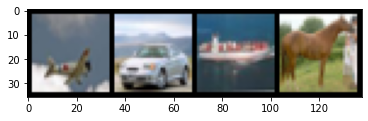

In [51]:
def plot_images(images, labels): 
    # normalise=True below shifts [-1,1] to [0,1]
    img_grid = torchvision.utils.make_grid(images, nrow=4, normalize=True)
    np_img = img_grid.numpy().transpose(1,2,0)  
    plt.imshow(np_img)
    
d_class2idx = train.class_to_idx
d_idx2class = dict(zip(d_class2idx.values(),d_class2idx.keys()))

images, labels = train_iter.next()
plot_images(images,labels)
print(' '.join('%5s' % d_idx2class[int(labels[j])]for j in range(len(images))))

In [52]:
import torch.nn as nn 
import torch.nn.functional as F 

In [100]:
class Net(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        # we use the maxpool multiple times, but define it once
        self.pool = nn.MaxPool2d(2,2)
        # in_channels = 6 because self.conv1 output 6 channel
        self.conv2 = nn.Conv2d(32,64,3) 
        # 5*5 comes from the dimension of the last convnet layer
        self.pool = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(64,128,3)
        self.fc1 = nn.Linear(128*2*2, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

        
        
    def forward(self, x): 
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128*2*2)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)  # no activation on final layer 
        return x

net = Net()

In [101]:
running_loss = 0 
printfreq = 1000
for epoch in range(100):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            running_loss = 0 

0 1000 2.305527094602585
0 2000 2.3045674152374267
0 3000 2.3052641994953156
1 1000 2.5931616747379302
1 2000 2.3054131059646608


KeyboardInterrupt: 

In [111]:
class Net(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        # we use the maxpool multiple times, but define it once
        self.pool = nn.MaxPool2d(2,2)
        # in_channels = 6 because self.conv1 output 6 channel
        self.conv2 = nn.Conv2d(6,16,5) 
        # 5*5 comes from the dimension of the last convnet layer
        self.fc1 = nn.Linear(16*5*5, 120)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        
        
    def forward(self, x): 
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # no activation on final layer 
        return x

net = Net()

In [112]:
# input_size = 32*32*3
# output_size = 10

# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(input_size, 256)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(256, 512)
#         self.relu2 = nn.ReLU()
#         self.fc3 = nn.Linear(512, 256)
#         self.relu3 = nn.ReLU()
#         self.fc4 = nn.Linear(256, 128)
#         self.relu4 = nn.ReLU()
#         self.out = nn.Linear(128, 10)
#         self.final = nn.Softmax()
        
#     def forward(self, x):
#         op = self.fc1(x)
#         op = self.relu1(op)
#         op = self.fc2(op)
#         op = self.relu2(op)
#         op = self.fc3(op)
#         op = self.relu3(op)
#         op = self.fc4(op)
#         op = self.relu4(op)
#         op = self.out(op)
#         y = self.final(op)

#         return y
    
# net = NeuralNetwork()

In [113]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [114]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.NAdam(net.parameters(), lr=0.001,)

In [115]:
trainloader = torch.utils.data.DataLoader(train, batch_size=10, 
                                          shuffle=True, num_workers=8)

In [116]:
inputs.shape

torch.Size([16, 3, 32, 32])

In [117]:
running_loss = 0 
printfreq = 1000
for epoch in range(100):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            running_loss = 0 

0 1000 1.8996847578287124
0 2000 1.6525961753726006
0 3000 1.5666611415743827
0 4000 1.5281010242104531
0 5000 1.4955574161410332
1 1000 1.441059765815735
1 2000 1.421997268795967
1 3000 1.409178201019764
1 4000 1.3879920935034753
1 5000 1.3593956351280212
2 1000 1.3447008588910103
2 2000 1.3058201215267182
2 3000 1.3390123934149742
2 4000 1.2952136410176753
2 5000 1.2933676102757454
3 1000 1.2554113399982452
3 2000 1.274786837220192
3 3000 1.278941196322441
3 4000 1.2871539056003094
3 5000 1.248865555524826
4 1000 1.2281837545633316
4 2000 1.2085829709917306
4 3000 1.2470274296104908
4 4000 1.2433344731628895
4 5000 1.2303608470857144
5 1000 1.190135300785303
5 2000 1.2050273856818676
5 3000 1.2171058128774166
5 4000 1.193396722048521
5 5000 1.206820663243532
6 1000 1.1497854254841804
6 2000 1.1699838901162147
6 3000 1.1951475262641906
6 4000 1.1744126423597336
6 5000 1.180076357573271
7 1000 1.1503332740068435
7 2000 1.1593293981552124
7 3000 1.1690953785181046
7 4000 1.1676529285907

61 5000 0.9259634386599064
62 1000 0.905374990478158
62 2000 0.927819366723299
62 3000 0.9112783662304282
62 4000 0.9186424146816135
62 5000 0.9444324414711446
63 1000 0.8852193999327719
63 2000 0.9383970482796431
63 3000 0.9194685113281011
63 4000 0.9227830574512482
63 5000 0.943477353066206
64 1000 0.8990093269497156
64 2000 0.9235711746066809
64 3000 0.9434136821329594
64 4000 0.8993978001326323
64 5000 0.9254563787281513
65 1000 0.9107941101565957
65 2000 0.9281939743459224
65 3000 0.9125421077013016
65 4000 0.9372749582827091
65 5000 0.929215217627585
66 1000 0.8883295499533415
66 2000 0.9321899148821831
66 3000 0.9206037128195167
66 4000 0.9245070146471261
66 5000 0.9101071799099445
67 1000 0.8906370210945607
67 2000 0.9431072320938111
67 3000 0.9078165440410375
67 4000 0.9334848338365554
67 5000 0.9183840195834637
68 1000 0.8923004476428031
68 2000 0.9329293577820063
68 3000 0.9327283194810152
68 4000 0.901868378072977
68 5000 0.9222971889302134
69 1000 0.9064130538552999
69 200

In [ ]:
# def predict(model,x_test,y_test):
#     y_test_pred = model(x_test)
#     a =np.where(y_test_pred>0.5,1,0)
#     return sum(a == y_test.numpy())/len(y_test)



In [80]:
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


In [81]:
print(optimizer.state_dict().keys())
print(optimizer.state_dict()['param_groups'])

dict_keys(['state', 'param_groups'])
[{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


In [82]:
fname = './CIFAR10_cnn.pth'
torch.save(net.state_dict(), fname)
loaded_dict = torch.load(fname)
net.load_state_dict(loaded_dict)

<All keys matched successfully>

In [83]:
net.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [84]:
# Reload net if needed
fname = './CIFAR10_cnn.pth'
loaded_dict = torch.load(fname)
net.load_state_dict(loaded_dict)

<All keys matched successfully>

 frog truck truck  deer


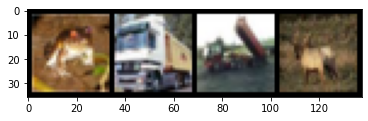

In [41]:
dataiter = iter(testloader)
images, labels = dataiter.next()
plot_images(images,labels)
print(' '.join('%5s' % d_idx2class[int(labels[j])]for j in range(len(images))))

In [85]:
outputs = net(images)
print(outputs)

tensor([[ 3.7279e-02, -9.4202e-01,  6.2636e-01,  1.7507e+00, -9.8803e-01,
          4.1633e-01,  1.3048e+00, -8.9697e-01, -1.3264e+00, -1.2534e-01],
        [ 1.6137e+00,  7.5823e-01, -7.6526e-01, -6.6014e-03, -4.4292e-01,
         -1.4524e+00, -4.4787e+00,  5.6431e-01,  1.1781e+00,  4.0347e+00],
        [ 2.8995e+00,  8.6214e+00, -3.5002e+00, -2.0068e+00, -3.0972e+00,
         -5.2769e+00, -4.2680e+00, -2.8432e+00,  5.5775e+00,  5.8116e+00],
        [ 8.6134e-01,  3.0685e+00, -5.9329e-01, -7.7855e-01, -6.7815e-01,
         -1.6793e+00, -1.0458e+00, -1.5293e+00,  1.4915e+00,  1.2220e+00]],
       grad_fn=<AddmmBackward0>)


 frog truck truck  frog


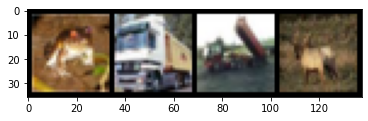

In [43]:
preds = outputs.argmax(dim=1)
plot_images(images,preds)
print(' '.join('%5s' % d_idx2class[int(preds[j])]for j in range(len(images))))

In [86]:
total = 0  # keeps track of how many images we have processed 
correct = 0  # keeps track of how many correct images our net predicts
with torch.no_grad():
    for i, data in enumerate(testloader): 
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size()[0]
        correct += (predicted == labels).sum().item()
    
print("Accuracy: ", correct/total)

Accuracy:  0.82834


In [87]:
class_correct = list(0 for i in range(10))  # Holds how many correct images for the class
class_total = list(0 for i in range(10))  # Holds total images for the class 

with torch.no_grad(): 
    for i, data in enumerate(testloader): 
        images, labels = data 
        outputs = net(images) 
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels)
        for j in range(4): 
            label = labels[j]
            class_correct[label] += c[j].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        d_idx2class[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 85 %
Accuracy of automobile : 90 %
Accuracy of  bird : 70 %
Accuracy of   cat : 65 %
Accuracy of  deer : 88 %
Accuracy of   dog : 74 %
Accuracy of  frog : 89 %
Accuracy of horse : 84 %
Accuracy of  ship : 93 %
Accuracy of truck : 85 %
